In [44]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_data(file_dir,
               file_name,
               data_type,
               compression_rate, pitch_range, time_range):
    def load_data(file_dir, file_name):
        file_path = os.path.join(file_dir, file_name)
        with open(file_path, 'rb') as f:
            data = pickle.load(f)
        return data

    def compress_and_rotate_output(output, compression_rate, pitch_range, time_range):
        original_shape = output.shape
        new_time_length = original_shape[0] // compression_rate
        new_shape = (new_time_length, original_shape[1])
        compressed_matrix = np.mean(output[:new_time_length * compression_rate, :].reshape(new_shape + (compression_rate,)), axis=2)
        time_range = slice(time_range[0], time_range[1])  # Adjust as needed
        pitch_range = slice(pitch_range[1], pitch_range[0] - 1, -1)  # Adjust as needed
        zoomed_matrix = compressed_matrix[time_range, pitch_range]
        rotated_matrix = np.rot90(zoomed_matrix)
        return rotated_matrix
    
    
    pitch_labels = [str(i) for i in range(pitch_range[1], pitch_range[0] - 1, -1)]
    data = load_data(file_dir, file_name)
    data_output = data[f'{data_type}']

    rotated_matrix_data = compress_and_rotate_output(data_output, compression_rate, pitch_range, time_range)

    # Plot the data from data1
    fig, ax = plt.subplots(figsize=(8, 4))
    im = ax.imshow(rotated_matrix_data, cmap='gray_r', aspect='auto', vmin=0, vmax=1.0)

    # Set the pitch labels
    ax.set_yticks(range(len(pitch_labels)))
    ax.set_yticklabels(pitch_labels)

    # Set axis labels and title
    ax.set_xlabel('')
    ax.set_ylabel('Pitch')
#     ax.set_xlabel('Compressed Time')
#     ax.set_ylabel('Pitch')
#     ax.set_title('Data from data1')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Velocity (normalised to 0~1)')

    plt.tight_layout()
    plt.show()

def plots():
    file_dir = "/scratch/ems011/zhe/202503_hpt/637024_0/202503_hpt/workspaces/probs_velo/maestro/Single_Velocity_HPT/60000_iteration"
    file_name = "MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_02_Track02_wav.pkl"
    
    for data_type in ["frame_roll"]: # "velocity_output", "onset_roll", 
        print(f"Plotting: {data_type}")
        plot_data(file_dir, file_name, data_type, compression_rate, pitch_range, time_range)

Plotting: frame_roll


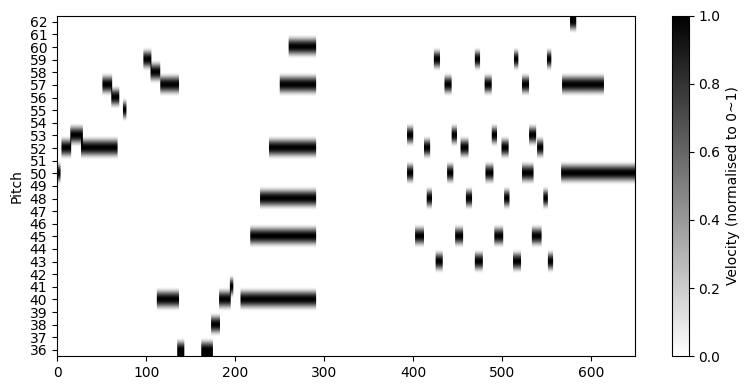

In [43]:
# pitch_range = [62, 70]
compression_rate = 1 # 38000/10 = 3800
pitch_range=(36, 62)
time_range=(950, 1600) 
plots()

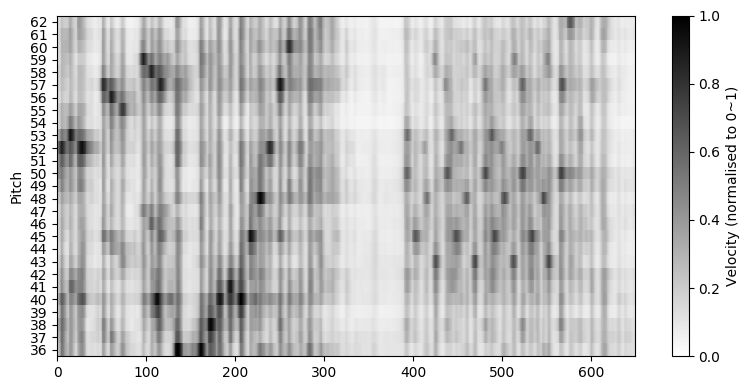

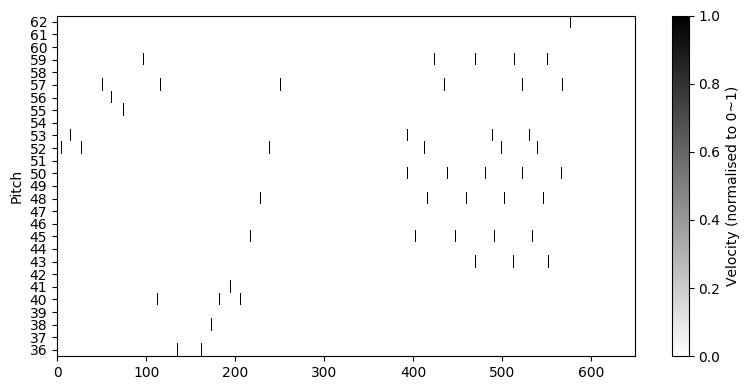

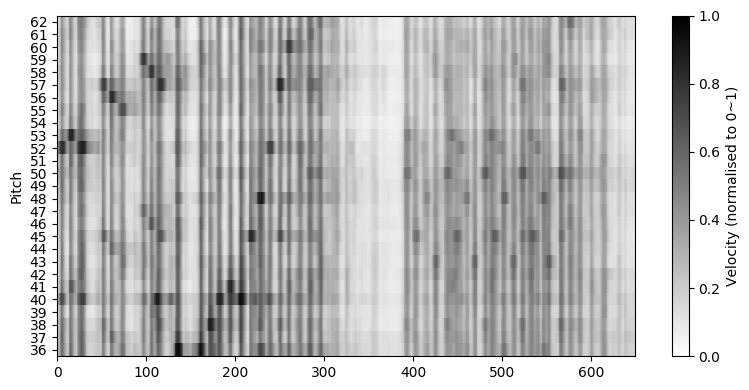

In [ ]:
# pitch_range = [62, 70]
compression_rate = 1 # 38000/10 = 3800
pitch_range=(36, 62)
time_range=(950, 1600) # 200 - 400

# Plot1
file_dir = "workspaces/probs/main/Dual_Velocity_HPT_add=onset/360000_iterations"
file_name = "MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_02_Track02_wav.pkl" 
data_type1 = 'velocity_output'
plot_data(file_dir, file_name, data_type, pitch_labels, compression_rate, pitch_range, time_range)

# Plot2
file_dir = "./workspaces/probs/origin/Note_pedal"
file_name = "MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_02_Track02_wav.pkl" 
data_type = 'onset_roll'
plot_data(file_dir, file_name, data_type, pitch_labels, compression_rate, pitch_range, time_range)

# Retrained HPT
file_dir = "workspaces/probs/main/Single_Velocity_HPT/360000_iterations"
file_name = "MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_02_Track02_wav.pkl" 
data_type = 'velocity_output'
plot_data(file_dir, file_name, data_type, pitch_labels, compression_rate, pitch_range, time_range)

Plotting: velocity_output


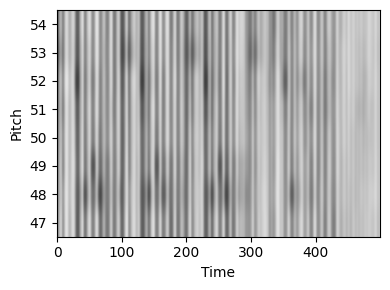

Plotting: onset_roll


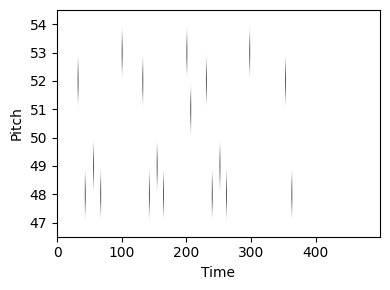

Plotting: frame_roll


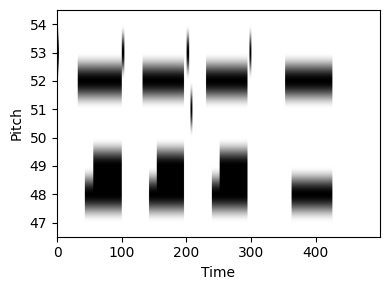

In [32]:
compression_rate = 1
pitch_range = (47, 55)
time_range = (2400, 2900)
plots()

Plotting: velocity_output


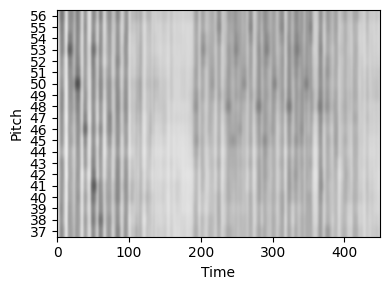

Plotting: onset_roll


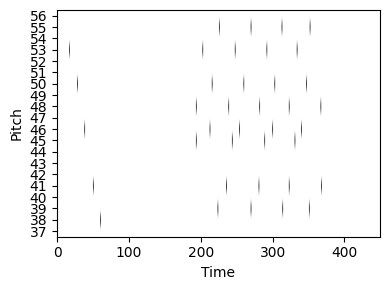

Plotting: frame_roll


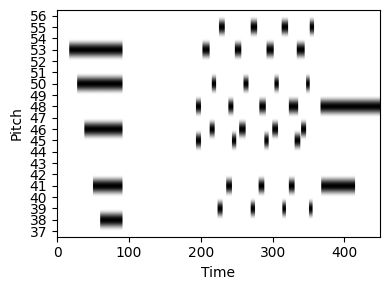

In [33]:
compression_rate = 1
pitch_range = (37, 57)
time_range = (1150, 1600)
plots()